In [1]:
import numpy as np
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv("medical_insurance.csv" , nrows = 600)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
595,46,female,33.725,1,no,northeast,8823.98575
596,42,female,29.480,2,no,southeast,7640.30920
597,34,female,33.250,1,no,northeast,5594.84550
598,43,male,32.600,2,no,southwest,7441.50100


In [3]:
"""
data = data.iloc[:, :-1]
data = data[["Precip Type",	"Temperature (C)",	"Apparent Temperature (C)",	"Humidity",	"Wind Speed (km/h)",	"Wind Bearing (degrees)",	"Visibility (km)",
"Loud Cover",	"Pressure (millibars)"]]
"""

'\ndata = data.iloc[:, :-1]\ndata = data[["Precip Type",\t"Temperature (C)",\t"Apparent Temperature (C)",\t"Humidity",\t"Wind Speed (km/h)",\t"Wind Bearing (degrees)",\t"Visibility (km)",\n"Loud Cover",\t"Pressure (millibars)"]]\n'

In [4]:
#data = data.drop("id", axis=1)

In [5]:
from sklearn import preprocessing 
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
data["sex"] = label_encoder.fit_transform(data["sex"])
data["children"] = label_encoder.fit_transform(data["children"])
data["smoker"] = label_encoder.fit_transform(data["smoker"])
data["region"] = label_encoder.fit_transform(data["region"])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
X = data.iloc[: , 0:-1]
#print(X)
y = data.iloc[: , -1]
#print(y)
print(data.shape)
print(X.shape)
print(y.shape)

(600, 7)
(600, 6)
(600,)


In [7]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()

# standardization 
X = object.fit_transform(X) 
#y = object.fit_transform(y) 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train

array([[ 1.20723174, -1.00668904, -0.35784902, -0.88995213, -0.49478609,
         1.34162279],
       [-1.41368653,  0.99335541, -0.40835264, -0.04639561, -0.49478609,
         1.34162279],
       [ 0.51751641, -1.00668904,  0.52007227,  1.64071744, -0.49478609,
        -0.46934161],
       ...,
       [-1.48265806,  0.99335541, -0.2450576 , -0.04639561, -0.49478609,
         0.43614059],
       [ 1.41414634,  0.99335541,  0.38455422,  1.64071744, -0.49478609,
         0.43614059],
       [-1.48265806, -1.00668904, -0.11964027, -0.88995213, -0.49478609,
        -1.37482381]])

## Experiment 1

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7407499678566778
Coefficient [3447.04020171 -438.67484153 2242.2870417    82.58002713 9730.44846467
 -668.89179916]
Intercept 13716.29287908457


### Poly

In [11]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [12]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
print(y_pred)


from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn import tree
#print(tree.export_text(Regressor))


from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

[10435.06525 28868.6639   1639.5631   1534.3045  14133.03775  9634.538
  3385.39915  1719.4363  17878.90068  1253.936   47896.79135  8124.4084
 46889.2612  24513.09126  2801.2588   7077.1894  36149.4835   1842.519
  7726.854   47928.03    19442.3535  37701.8768   6079.6715   8516.829
  7726.854   10461.9794  12592.5345   2156.7518   8334.45755  6196.448
  8232.6388   4074.4537  48885.13561 19214.70553  2302.3      1639.5631
 12592.5345  20630.28351 37701.8768   7742.1098   3561.8889  36837.467
  3877.30425  2855.43755  6406.4107   4827.90495  7789.635    5012.471
 23288.9284  23082.95533 10231.4999   3561.8889   3756.6216   4040.55825
  9193.8385   9620.3307   6600.20595  9620.3307   2395.17155  1639.5631
  4922.9159   6082.405    9140.951    5253.524    3385.39915 35147.52848
 10435.06525  5974.3847  19144.57652  8444.474   11090.7178   8232.6388
  3857.75925 23082.95533  4618.0799   8823.279   38709.176   17560.37975
  1261.859    7345.084    8083.9198   5974.3847   7740.337    4762.

<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [14]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

### Error Rate

In [15]:
error = errors_lr, errors_pr, errors_dt, errors_rf, errors_sm
error =  {"name": ["LR", "Ply", "DT", "RF" , "SVM"], "Error": error} 
error = pd.DataFrame(error) 
error



,name,Error
0,LR,4291.357721
1,Ply,4291.357721
2,DT,3706.500141
3,RF,3017.481552
4,SVM,7534.725342


In [16]:
error1 = list(error)

In [17]:
error1

['name', 'Error']

In [18]:
# importing the pandas library
import pandas as pd
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error = {"Attr": "Error", "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

#column_name = [name, error1]
error = pd.DataFrame([error])
error

,Attr,LR,Ply,DT,RF,SVM
0,Error,4291.357721,4291.357721,3706.500141,3017.481552,7534.725342


## Cross Validation when n_split = 2

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(reg, X_train, y_train, scoring='r2', cv=folds)
scores  
y_pred_1 =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred_1)
errors_lr

kf = KFold(n_splits=2)

from sklearn.model_selection import KFold
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7741280987202982
Coefficient [4169.66512276  423.15532847 2141.14880563  431.89498621 9287.56726293
 -337.29816581]
Intercept 13087.168860633235


In [21]:
errors_lr

4447.717964688884

In [22]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn import tree
#print(tree.export_text(Regressor))


from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [26]:
import pandas as pd
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": "CL_2", "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

error = error._append(error1, ignore_index=True)

error

,Attr,LR,Ply,DT,RF,SVM
0,Error,4291.357721,4291.357721,3706.500141,3017.481552,7534.725342
1,CL_2,4447.717965,4447.717965,3373.516351,2991.667965,7809.387437


## Cross Vaidation when N splits = 5

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7503629482414114
Coefficient [3867.58403472  274.93353687 1868.26826993  325.41054813 9132.10288926
 -169.59312957]
Intercept 13133.700597034263


In [29]:
errors_lr

4542.904990326425

In [30]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
#print(y_pred)

from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

#fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn import tree
#print(tree.export_text(Regressor))


from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

### Random Forest 

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [34]:
import pandas as pd
var = "CV_5"
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": var, "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

error = error._append(error1, ignore_index=True)

error

,Attr,LR,Ply,DT,RF,SVM
0,Error,4291.357721,4291.357721,3706.500141,3017.481552,7534.725342
1,CL_2,4447.717965,4447.717965,3373.516351,2991.667965,7809.387437
2,CV_5,4542.904990,4542.904990,3107.366576,3355.681216,8109.292842


## Cross Validation when k-folds is 10

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(reg, X_train, y_train, scoring='r2', cv=folds)
scores  
y_pred_1 =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred_1)
errors_lr

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7389955078968944
Coefficient [3761.55788428  166.33716843 1864.15409017  212.09707296 9180.13519857
 -233.39231623]
Intercept 13211.337577859751


In [37]:
errors_lr

4555.98237123932

In [38]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn import tree
#print(tree.export_text(Regressor))


from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [41]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [42]:
var = "kfolds_is_10"
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": var, "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

error = error._append(error1, ignore_index=True)

error

,Attr,LR,Ply,DT,RF,SVM
0,Error,4291.357721,4291.357721,3706.500141,3017.481552,7534.725342
1,CL_2,4447.717965,4447.717965,3373.516351,2991.667965,7809.387437
2,CV_5,4542.904990,4542.904990,3107.366576,3355.681216,8109.292842
3,kfolds_is_10,4555.982371,4555.982371,3977.705468,3428.890650,8667.894972


## LeaveOneOut Cross Validation

In [43]:
## import numpy as np
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7434418285542999
Coefficient [3767.2085006   -52.71954256 1983.30952058  172.63433995 9485.39997943
 -351.32171305]
Intercept 13247.30654008134


In [45]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn import tree
#print(tree.export_text(Regressor))


from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [48]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [49]:
import pandas as pd
var = "LeaveOneOut"
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": var, "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

error = error._append(error1, ignore_index=True)

error

,Attr,LR,Ply,DT,RF,SVM
0,Error,4291.357721,4291.357721,3706.500141,3017.481552,7534.725342
1,CL_2,4447.717965,4447.717965,3373.516351,2991.667965,7809.387437
2,CV_5,4542.904990,4542.904990,3107.366576,3355.681216,8109.292842
3,kfolds_is_10,4555.982371,4555.982371,3977.705468,3428.890650,8667.894972
4,LeaveOneOut,19076.812120,19076.812120,22075.071690,22097.302604,24100.990142


## Repeated K-Fold Cross-Validation when n = 2

In [50]:
import numpy as np
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=42)
for train_index, test_index in rkf.split(X):
#    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7375694908511901
Coefficient [3674.47346469   42.73049772 2137.83827875  467.99829407 9588.89376588
 -336.38093314]
Intercept 13548.552253343689


In [52]:
errors_lr

4212.1019035487

In [53]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
print(y_pred)


from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

[18033.9679   4260.744    4667.60765  3554.203    8823.279    6203.90175
  6203.90175 12629.8967  28950.4692  10601.412    3947.4131   1725.5523
 14001.2867  13430.265    2643.2685  38746.3551  12142.5786  38746.3551
 38709.176    3044.2133  27375.90478 10601.412   14133.03775  4133.64165
  2404.7338  21082.16    36950.2567  42856.838   37701.8768   8017.06115
 12913.9924  15359.1045   1744.465    6186.127   18608.262   24671.66334
 20462.99766 12333.828    7441.501    1391.5287   6186.127    3645.0894
  6948.7008  38746.3551  38511.6283  11073.176    2755.02095 27346.04207
 30942.1918  43578.9394  10601.412   24393.6224   2203.47185  5478.0368
 20984.0936   1842.519   11879.10405 12105.32    19214.70553 12574.049
 18033.9679   8116.68     7441.501    1704.5681   4337.7352  18033.9679
 14451.83515 20462.99766  1632.03625  2643.2685  18608.262   35147.52848
 18804.7524  27346.04207  6686.4313  19515.5416   6389.37785 25992.82104
 37133.8982  19214.70553 10736.87075  4687.797    6334.343

<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [56]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [57]:
var = "RepeatedKFold_is_2"
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": var, "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

error = error._append(error1, ignore_index=True)

error

,Attr,LR,Ply,DT,RF,SVM
0,Error,4291.357721,4291.357721,3706.500141,3017.481552,7534.725342
1,CL_2,4447.717965,4447.717965,3373.516351,2991.667965,7809.387437
2,CV_5,4542.904990,4542.904990,3107.366576,3355.681216,8109.292842
3,kfolds_is_10,4555.982371,4555.982371,3977.705468,3428.890650,8667.894972
4,LeaveOneOut,19076.812120,19076.812120,22075.071690,22097.302604,24100.990142
5,RepeatedKFold_is_2,4212.101904,4212.101904,3975.843458,3528.660698,7933.082450


## Repeated K-Fold Cross-Validation when n = 5

In [58]:
import numpy as np
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
for train_index, test_index in rkf.split(X):
#    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7381771633930518
Coefficient [3752.03443188  -78.90420287 2175.86598436  337.59617992 9402.9462717
 -572.43180241]
Intercept 13379.163673112065


In [60]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [62]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [63]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [64]:
var = "RepeatedKFold_is_5"
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": var, "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}

error = error._append(error1, ignore_index=True)

error

,Attr,LR,Ply,DT,RF,SVM
0,Error,4291.357721,4291.357721,3706.500141,3017.481552,7534.725342
1,CL_2,4447.717965,4447.717965,3373.516351,2991.667965,7809.387437
2,CV_5,4542.904990,4542.904990,3107.366576,3355.681216,8109.292842
3,kfolds_is_10,4555.982371,4555.982371,3977.705468,3428.890650,8667.894972
4,LeaveOneOut,19076.812120,19076.812120,22075.071690,22097.302604,24100.990142
5,RepeatedKFold_is_2,4212.101904,4212.101904,3975.843458,3528.660698,7933.082450
6,RepeatedKFold_is_5,4320.451082,4320.451082,3576.473123,3007.481133,7749.782297


## Repeated K-Fold Cross-Validation when n = 10

In [65]:
import numpy as np
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=42)
for train_index, test_index in rkf.split(X):
#    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [66]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("Reg_Score" , reg.score(X_train, y_train))
print("Coefficient",  reg.coef_)
print("Intercept",  reg.intercept_)
y_pred =  reg.predict(X_test)
errors_lr = mean_absolute_error(y_test, y_pred)

Reg_Score 0.7377388690996873
Coefficient [3824.48816644 -119.74616642 2142.14126992  200.97712294 9432.36845695
 -436.76369719]
Intercept 13244.07486314346


In [67]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

y_pred =  lin2.predict(poly.fit_transform(X_test))
errors_pr = mean_absolute_error(y_test, y_pred)

### Decision Tree Regression

In [68]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn import tree

features = data.columns
features = features[:-1]
features

fig = plt.figure(figsize=(25,20))
#plot = tree.plot_tree(Regressor, feature_names=features, filled=True)

from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
# example of calculate the root mean squared error
errors_dt = mean_absolute_error(y_test, y_pred)

<Figure size 2500x2000 with 0 Axes>

### Random Forest 

In [69]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
errors_rf = mean_absolute_error(y_test, y_pred)

In [70]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
#y_pred = sc_y.inverse_transform(y_pred) 
y_pred
errors_sm = mean_absolute_error(y_test, y_pred)

In [71]:
var = "RepeatedKFold_is_10"
#error = {errors_lr, errors_pr, errors_dt, errors_rf, errors_sm}
error1 = {"Attr": var, "LR": errors_lr, "Ply": errors_pr, "DT":errors_dt, "RF":errors_rf , "SVM":errors_sm}
error = error._append(error1, ignore_index=True)
error

,Attr,LR,Ply,DT,RF,SVM
0,Error,4291.357721,4291.357721,3706.500141,3017.481552,7534.725342
1,CL_2,4447.717965,4447.717965,3373.516351,2991.667965,7809.387437
2,CV_5,4542.904990,4542.904990,3107.366576,3355.681216,8109.292842
3,kfolds_is_10,4555.982371,4555.982371,3977.705468,3428.890650,8667.894972
4,LeaveOneOut,19076.812120,19076.812120,22075.071690,22097.302604,24100.990142
5,RepeatedKFold_is_2,4212.101904,4212.101904,3975.843458,3528.660698,7933.082450
6,RepeatedKFold_is_5,4320.451082,4320.451082,3576.473123,3007.481133,7749.782297
7,RepeatedKFold_is_10,4242.232987,4242.232987,2772.724561,2815.935922,8643.582586


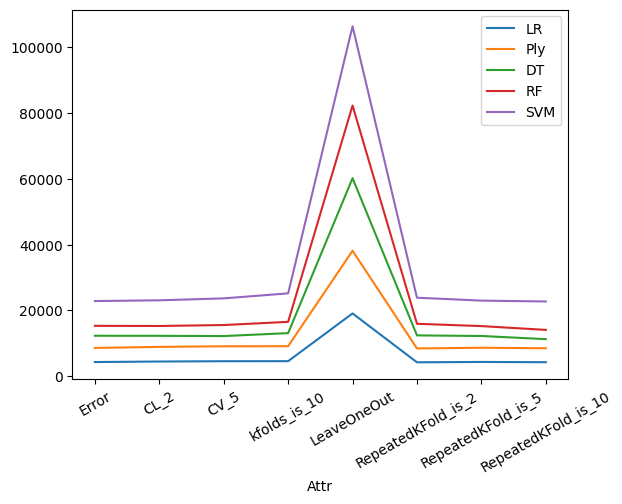

In [72]:
#plt = error.plot( title="SeriesGroupBy Plot")

# Plot unstacked multiple columns such as population and year from DataFrame
plt = error.plot(x="Attr", stacked=True, rot=30)

In [ ]:
error